# Graduate School Prediction

## Introduction

The goal of this project is to implement a machine learning model that could predict acceptance into graduate school given certain parameters.

The data is obtained from kaggle and randomly edited by myself to mimic a less ideal situation.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initial Data Exploration

In [2]:
graduate = pd.read_csv('graduate.csv')
graduate.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


The dataset contains the following columns:

- Serial No. 
- GRE Score: GRE stands for Graduate Record Examination. The goal of GRE is to evaluate the candidate's understanding of basic arithmetic, algebra, geometry, and college vocabulary. There are three scoring sections: Analytical writing, verbal reasoning (130-170), quantitative reasoning (130-170). The dataset uses the total combined score **[260-340]**.
- TOFEL Score: TOFEL is a standarized test for English as a second language. The score ranges from 0-120 points **[0-120]**.
- University Rating: The student's undergraduate institution rating. **[0-5]**
- SOP: Statement of purpose is usually is required, and it states the student's intention to apply to a certain graduate program. **[0-5]**
- LOR: Letter of recommendation. Graduate school normally request letter of recommendations and they weight quite hevily. **[0-5]**
- CGPA: Cumulative GPA **[0-10]**
- Research: 0-No Research, 1-Yes Research
- Chance of Admit: probability of being admitted to grad school (Using UCLA as the metric). This is the value that we aim to predict. 

In [3]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          396 non-null    float64
 2   TOEFL Score        391 non-null    float64
 3   University Rating  389 non-null    float64
 4   SOP                396 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 28.2 KB


The data contains 400 instances. Several columns contain a small amount of missing values. All of the values are numerical, which would be convenient for our modeling purposes.

In [4]:
graduate.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,396.000000,391.000000,389.000000,396.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.777778,107.406650,3.089974,3.400253,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.454085,6.107654,1.148566,1.006070,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The mean metric of every columns seems to give a pool of representative data entries given that the student's goal is to attend UCLA for their graduate studies. To gain a further insight into the distribution of several features, we would plot the histogram for all columns.

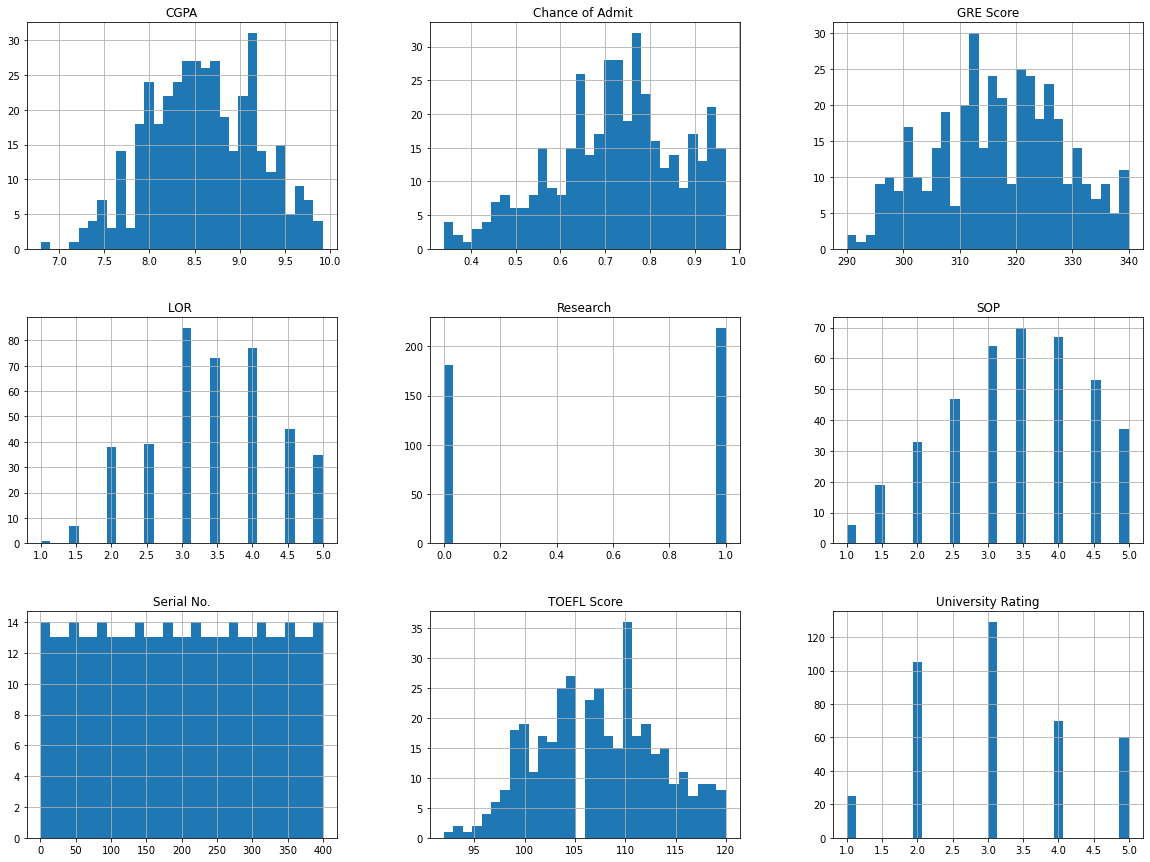

In [5]:
graduate.hist(bins=30, figsize=(20,15))
plt.show()

Most academic metrics are slightly head-heavy, which is understandable since UCLA is a quite competitive institution. It is worth noting that the University Rating column is slightly tail-heavy, which either indicates that many people are applying to UCLA as a reach school or UCLA has a medium rating in the scale of this dataset.

## Creating a Test Set

Before examining the data closely, let's first select 20% of the data as our test set so we don't introduce human based bias. Since our dataset is quite small and well distributed, we can implement a random sampling method.

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(graduate, random_state = 42, test_size = 0.2)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3 to 102
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         320 non-null    int64  
 1   GRE Score          316 non-null    float64
 2   TOEFL Score        313 non-null    float64
 3   University Rating  311 non-null    float64
 4   SOP                316 non-null    float64
 5   LOR                320 non-null    float64
 6   CGPA               320 non-null    float64
 7   Research           320 non-null    int64  
 8   Chance of Admit    320 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 25.0 KB


In [8]:
train_set.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,320.000000,316.000000,313.000000,311.000000,316.000000,320.000000,320.000000,320.000000,320.000000
mean,203.518750,316.810127,107.463259,3.067524,3.370253,3.450000,8.587813,0.537500,0.725281
std,113.179386,11.263737,6.063718,1.149449,1.020707,0.897925,0.588534,0.499373,0.137685
min,2.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,108.750000,309.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,204.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,302.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.020000,1.000000,0.820000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Visualize Data and Find Correlations

Now that we have seperated out the test set, we should gain more insight by looking into the data closely. It would be interesting to see how standarized test scores correlates with other university metrics.

In [9]:
# Make a copy of train set to avoid messing with data
graduate = train_set.copy()
graduate.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# Chance of Admit and LOR has a space after
graduate = graduate.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})
train_set = train_set.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})

graduate.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

Since the dataset is not too large, we could compute Pearson's r for attributes and identify correlations.

In [11]:
corr_matrix = graduate.corr()
corr_matrix['Chance of Admit'].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.868929
GRE Score            0.802375
TOEFL Score          0.788990
University Rating    0.734449
SOP                  0.670729
LOR                  0.644791
Research             0.547188
Serial No.           0.076492
Name: Chance of Admit, dtype: float64

Everything except for the serial number expectadily had a somewhathigh correlation with the chance of admit. It is interesting to see that less subjective values such as CGPA and GRE has a higher correlation with admittance, where as purpose statement and letter of recommendations which are rated has a less of a correlation. Now we can visualize the data of the values that have the highest correlations with scatter plots.

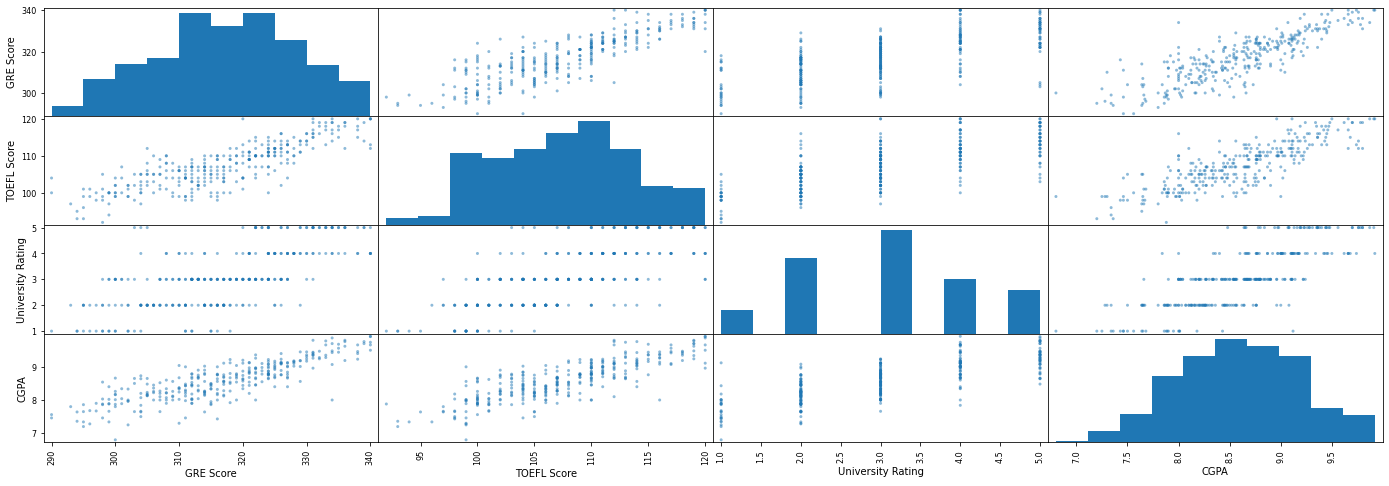

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['GRE Score', 'TOEFL Score', 'University Rating','CGPA']
scatter_matrix(graduate[attributes], figsize = (24, 8))
plt.show()

Our data seem to have a strong linear relationship, which is hinting that a linear regression model might be appropriate. But before testing out any models, we need to do more data preperation.

## Data Cleaning

In [13]:
# Seperate predictor with target value
graduate = train_set.drop(['Serial No.', 'Chance of Admit'], axis=1)
graduate_labels = train_set['Chance of Admit'].copy()
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322.0,110.0,3.0,3.5,2.5,8.67,1
18,318.0,110.0,3.0,4.0,3.0,8.80,0
202,340.0,120.0,5.0,4.5,4.5,9.91,1
250,320.0,104.0,3.0,3.0,2.5,8.57,1
274,315.0,100.0,1.0,2.0,2.5,7.95,0


Since most of our instances has a strong correlation with our target label, and there aren't too many values missing, it is logical to impute the median values in place of missing values. 

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(graduate)

# transform into a NumPy Array
X = imputer.transform(graduate)

print(imputer.statistics_)

[317.   107.     3.     3.5    3.5    8.64   1.  ]


In [35]:
# Construct a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

graduate_prepared = pipeline.fit_transform(graduate)

## Select and Train Model

The linear correlation between our feature and target is fairly strong, which means that is might be appropriate to try the linear regression model first.

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(graduate_prepared, graduate_labels)

LinearRegression()

In [17]:
# Make Prediction on train set
graduate_prediction = lin_reg.predict(graduate_prepared)

In [18]:
# Evaluate performance
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(graduate_prediction, graduate_labels))
print(lin_rmse)

0.06232433477865438


The linear regression model fit the data very well! Let's try other models to see if any of them would edge out the current model. 

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(graduate_prepared, graduate_labels)
tree_predict = tree_reg.predict(graduate_prepared)

tree_rmse = np.sqrt(mean_squared_error(tree_predict, graduate_labels))
print(tree_rmse)

1.5202354861220293e-17


The decision model seems to have a lower rmse compared to the linear regression model, but it might be due to overfitting. Let's try two more models

In [20]:
from sklearn.svm import SVR
support_vector = SVR(kernel='linear', C=1.0)
support_vector.fit(graduate_prepared, graduate_labels)
svm_predictions = support_vector.predict(graduate_prepared)

svm_rmse = np.sqrt(mean_squared_error(svm_predictions, graduate_labels))
print(svm_rmse)

0.07147961262675721


In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(graduate_prepared, graduate_labels)
forest_predictions = forest_reg.predict(graduate_prepared)

forest_rmse = np.sqrt(mean_squared_error(graduate_labels, forest_predictions))
print(forest_rmse)

0.026649037271541366


## Cross-Validation

Let's use the cross-validation technique with a k-fold of 10 to identify if there are any overfitting in the models.

In [22]:
# write function to display results
def display_score(scores, model):
    print('Model:', model)
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation', scores.std())
    print('\n')

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, graduate_prepared, graduate_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_score(tree_rmse_scores, 'Decision Tree')

Model: Decision Tree
Scores: [0.07359093 0.09904229 0.11665923 0.09122431 0.09831391 0.10508925
 0.09677616 0.0887764  0.1188355  0.06262488]
Mean: 0.09509328493627003
Standard deviation 0.016519447933552676




In [24]:
models = [lin_reg, tree_reg, support_vector, forest_reg]
for model in models:
    scores = cross_val_score(model, graduate_prepared, graduate_labels, scoring = 'neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    display_score(rmse_scores, model)

Model: LinearRegression()
Scores: [0.06830431 0.05047547 0.09018605 0.05896926 0.05755732 0.06811146
 0.06551082 0.0672304  0.05409526 0.04953581]
Mean: 0.06299761377638957
Standard deviation 0.0113174935784771


Model: DecisionTreeRegressor()
Scores: [0.07656696 0.09342443 0.11482323 0.09041571 0.10572665 0.09748397
 0.10145812 0.08149003 0.11820269 0.06446898]
Mean: 0.09440607848726723
Standard deviation 0.016027081601337742


Model: SVR(kernel='linear')
Scores: [0.07476873 0.05766281 0.08782546 0.06331941 0.07356476 0.07420837
 0.07604503 0.07411149 0.06696958 0.0715895 ]
Mean: 0.07200651585777566
Standard deviation 0.007698298874119935


Model: RandomForestRegressor()
Scores: [0.07070382 0.06464717 0.09821073 0.07072185 0.06044131 0.07073657
 0.06751664 0.06944908 0.07375946 0.05933713]
Mean: 0.07055237643660407
Standard deviation 0.010240482979220904




All of the model seem to perform reasonably well. But it seems like the linear regression model does the best job in fitting our data, so we will fine tune our linear regression model before applying it to our test set.

## Fine-Tuning Model

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
]

lin_reg = LinearRegression()
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(graduate_prepared, graduate_labels)
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [26]:
grid_search.best_estimator_

LinearRegression()

## Evaluate System on Test Set

We have found our best fitting model, and we can finally test it with the test set!

In [27]:
# Select our best fitting model
final_model = grid_search.best_estimator_

In [69]:
test_set = test_set.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})
X_test = test_set.drop(['Serial No.', 'Chance of Admit'], axis = 1)
y_test = test_set['Chance of Admit'].copy()

X_test_prepared = pipeline.fit_transform(X_test)

In [70]:
final_predictions = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(final_predictions, y_test))
print(final_rmse)

0.06883264775458356


In [71]:
# Calculate the precision of estimate
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.05057051, 0.08317746])

As aspected for graduate admissions, many of academic standards are linearly correlated with the acceptance rate. With the intuition, we trained a few regression models and decided that the linear regression model is best estimates the chance of acceptance. 

## Test Model on Wild Data

Just for Funzzies I had some friends who are applying to grad school to test out the model.